# 📊 Credit Risk Analysis

This notebook shows how to use logistic regression to predict corporate bond defaults using Python.

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
# Load data
df = pd.read_csv("../data/bond_data.csv")
df.head()

,Years_Since_Issuance,Credit_Score,Interest_Rate,Debt_to_Equity,GDP_Growth,Default
0,7,641,9.16,0.54,2.86,0
1,4,743,7.89,0.78,1.66,0
2,8,723,4.77,2.62,2.00,0
3,5,606,11.10,1.47,1.81,0
4,7,610,2.45,1.65,2.59,0


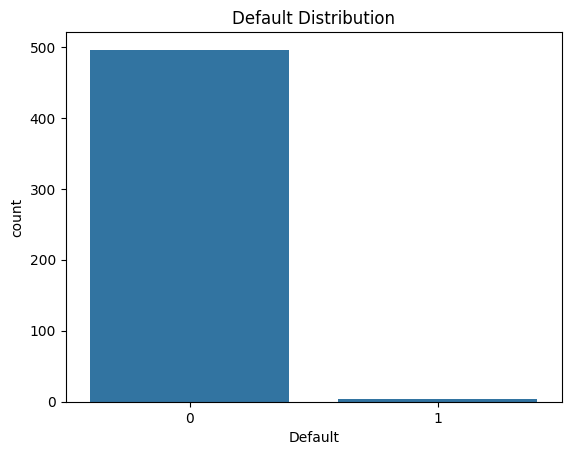

In [5]:
# Data visualization
sns.countplot(x='Default', data=df)
plt.title('Default Distribution')
plt.show()

In [ ]:
# Features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ROC Curve
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()